### 서포트 벡터 머신(SVM)

In [1]:
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt

plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_diabetes, load_breast_cancer, load_iris, load_wine, fetch_california_housing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

### SVR

In [3]:
X, y = load_diabetes(return_X_y=True) # 당뇨병 데이터 셋
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = SVR()
model.fit(X_train, y_train)

print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.1869511678626613
평가 데이터 점수 : 0.12811948040601506


### 커널 함수

In [4]:
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print(f'Linear SVR 학습 데이터 점수 : {linear_svr.score(X_train, y_train)}')
print(f'Linear SVR 평가 데이터 점수 : {linear_svr.score(X_test, y_test)}')

poly_svr = SVR(kernel='poly')
poly_svr.fit(X_train, y_train)

print(f'Poly SVR 학습 데이터 점수 : {poly_svr.score(X_train, y_train)}')
print(f'Poly SVR 평가 데이터 점수 : {poly_svr.score(X_test, y_test)}')

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print(f'RBF SVR 학습 데이터 점수 : {rbf_svr.score(X_train, y_train)}')
print(f'RBF SVR 평가 데이터 점수 : {rbf_svr.score(X_test, y_test)}')

Linear SVR 학습 데이터 점수 : 0.0003558037971866934
Linear SVR 평가 데이터 점수 : -0.023121595621342417
Poly SVR 학습 데이터 점수 : 0.28014273572816073
Poly SVR 평가 데이터 점수 : 0.16773700903892952
RBF SVR 학습 데이터 점수 : 0.1869511678626613
RBF SVR 평가 데이터 점수 : 0.12811948040601506


### SVC

In [10]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print(f'Linear SVC 학습 데이터 점수 : {linear_svc.score(X_train, y_train)}')
print(f'Linear SVC 평가 데이터 점수 : {linear_svc.score(X_test, y_test)}')

poly_svc = SVC(kernel='poly')
poly_svc.fit(X_train, y_train)

print(f'Poly SVC 학습 데이터 점수 : {poly_svc.score(X_train, y_train)}')
print(f'Poly SVC 평가 데이터 점수 : {poly_svc.score(X_test, y_test)}')

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print(f'RBF SVC 학습 데이터 점수 : {rbf_svc.score(X_train, y_train)}')
print(f'RBF SVC 평가 데이터 점수 : {rbf_svc.score(X_test, y_test)}')

Linear SVC 학습 데이터 점수 : 0.9648351648351648
Linear SVC 평가 데이터 점수 : 0.956140350877193
Poly SVC 학습 데이터 점수 : 0.9054945054945055
Poly SVC 평가 데이터 점수 : 0.9122807017543859
RBF SVC 학습 데이터 점수 : 0.9098901098901099
RBF SVC 평가 데이터 점수 : 0.9298245614035088


### 매개변수 튜닝

In [11]:
poly_svc = SVC(kernel='poly', degree=2, C=.1, gamma='auto')
poly_svc.fit(X_train, y_train)

print(f'Poly SVC 학습 데이터 점수 : {poly_svc.score(X_train, y_train)}')
print(f'Poly SVC 평가 데이터 점수 : {poly_svc.score(X_test, y_test)}')

Poly SVC 학습 데이터 점수 : 0.9802197802197802
Poly SVC 평가 데이터 점수 : 0.9473684210526315


In [13]:
poly_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
poly_svc.fit(X_train, y_train)

print(f'RBF SVC 학습 데이터 점수 : {poly_svc.score(X_train, y_train)}')
print(f'RBF SVC 평가 데이터 점수 : {poly_svc.score(X_test, y_test)}')

RBF SVC 학습 데이터 점수 : 0.9186813186813186
RBF SVC 평가 데이터 점수 : 0.9385964912280702


### 데이터 전처리

In [14]:
model = SVC()
model.fit(X_train, y_train)

print(f'SVC 학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'SVC 평가 데이터 점수 : {model.score(X_test, y_test)}')


SVC 학습 데이터 점수 : 0.9098901098901099
SVC 평가 데이터 점수 : 0.9298245614035088


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model.fit(X_train, y_train)

print(f'SVC 학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'SVC 평가 데이터 점수 : {model.score(X_test, y_test)}')

SVC 학습 데이터 점수 : 0.9846153846153847
SVC 평가 데이터 점수 : 0.9824561403508771


In [6]:
X, y = load_diabetes(return_X_y=True) # 당뇨병 데이터 셋
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = SVR(kernel='poly')
model.fit(X_train, y_train)

print(f'SVR 학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'SVR 평가 데이터 점수 : {model.score(X_test, y_test)}')

SVR 학습 데이터 점수 : 0.28014273572816073
SVR 평가 데이터 점수 : 0.16773700903892952


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model.fit(X_train, y_train)

print(f'SVR 학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'SVR 평가 데이터 점수 : {model.score(X_test, y_test)}')

SVR 학습 데이터 점수 : 0.2795546317101363
SVR 평가 데이터 점수 : 0.2032782575878188


c:\Users\BSH\.virtualenvs\study-Im21C8TV\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\BSH\.virtualenvs\study-Im21C8TV\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


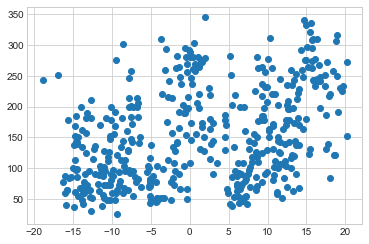

In [8]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

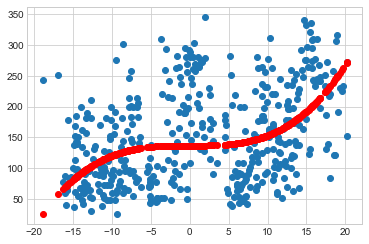

In [9]:
model.fit(X_comp, y)
pred = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, pred, color='r')

In [10]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='poly'))

cross_validate(
  estimator=estimator,
  X=X, y=y,
  cv = 5,
  n_jobs=multiprocessing.cpu_count(),
  verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    1.7s finished


{'fit_time': array([0.00499749, 0.00499821, 0.0039978 , 0.0039978 , 0.00500011]),
 'score_time': array([0.0010004 , 0.00100017, 0.0010004 , 0.0010004 , 0.00099897]),
 'test_score': array([0.24239048, 0.18405735, 0.27252643, 0.24336165, 0.23041666])}

In [13]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='linear'))])

param_grid = [{
  'model__gamma' : ['scale', 'auto'],
  'model__C' : [1.0, 0.1, 0.01],
  'model__epsilon' : [1.0, 0.1, 0.01]  
}]

gs = GridSearchCV(
  estimator=pipe,
  param_grid=param_grid,
  n_jobs=multiprocessing.cpu_count(),
  cv=5,
  verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=16,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [14]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

In [15]:
gs.best_params_

{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}